In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Resources/dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
# Drop unwanted columns
cols_to_drop = ["Unnamed: 0", "track_id","artists" ,"album_name","track_name"]
df = df.drop(columns=cols_to_drop)
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
# Get the unique values in the 'track_genre' column
unique_genres = df['track_genre'].unique()

# Print the unique genres
print(unique_genres)

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [7]:
# Genre to category mapping for playlist creation
genre_to_category = {
    # EDM
    'edm': 'Electronic Dance Music', 
    'house': 'Electronic Dance Music', 
    'electro': 'Electronic Dance Music', 
    'trance': 'Electronic Dance Music', 
    'techno': 'Electronic Dance Music', 
    'dubstep': 'Electronic Dance Music', 
    'drum-and-bass': 'Electronic Dance Music', 
    'deep-house': 'Electronic Dance Music', 
    'detroit-techno': 'Electronic Dance Music', 
    'minimal-techno': 'Electronic Dance Music', 
    'progressive-house': 'Electronic Dance Music', 
    'breakbeat': 'Electronic Dance Music',
    
    # Rock
    'alt-rock': 'Rock', 
    'rock': 'Rock', 
    'indie': 'Rock', 
    'indie-pop': 'Rock', 
    'punk': 'Rock', 
    'punk-rock': 'Rock', 
    'hard-rock': 'Rock', 
    'metal': 'Rock', 
    'heavy-metal': 'Rock', 
    'black-metal': 'Rock', 
    'death-metal': 'Rock', 
    'grunge': 'Rock',
    
    # Hip-Hop and R&B
    'hip-hop': 'Hip-Hop and R&B', 
    'r-n-b': 'Hip-Hop and R&B', 
    'trap': 'Hip-Hop and R&B',
    
    # Pop
    'pop': 'Pop', 
    'electro-pop': 'Pop', 
    'synth-pop': 'Pop', 
    'k-pop': 'Pop', 
    'pop-film': 'Pop', 
    'power-pop': 'Pop',
    
    # Latin & Reggae/Dancehall
    'latin': 'Latin & Reggae/Dancehall', 
    'reggaeton': 'Latin & Reggae/Dancehall', 
    'salsa': 'Latin & Reggae/Dancehall', 
    'samba': 'Latin & Reggae/Dancehall', 
    'reggae': 'Latin & Reggae/Dancehall', 
    'dancehall': 'Latin & Reggae/Dancehall',
    
    # Funk and Disco
    'funk': 'Funk and Disco', 
    'disco': 'Funk and Disco', 
    'groove': 'Funk and Disco',
}

# Map each track to a category
df['music_category'] = df['track_genre'].apply(lambda x: genre_to_category.get(x, 'Other'))

# Check the new categories in the dataframe
print(df[['track_genre', 'music_category']].head())


  track_genre music_category
0    acoustic          Other
1    acoustic          Other
2    acoustic          Other
3    acoustic          Other
4    acoustic          Other


In [8]:

# Creating  an instance of LabelEncoder
label_encoder = LabelEncoder()

# We will now fit and transform the 'music_category' column to numeric values
df['music_category_encoded'] = label_encoder.fit_transform(df['music_category'])


print(df[['music_category', 'music_category_encoded']].head())

  music_category  music_category_encoded
0          Other                       4
1          Other                       4
2          Other                       4
3          Other                       4
4          Other                       4


In [9]:
df = pd.get_dummies(df, columns=['music_category'], drop_first=True)

# Check the result
print(df.head())

   popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          73       230666     False         0.676  0.4610    1    -6.746   
1          55       149610     False         0.420  0.1660    1   -17.235   
2          57       210826     False         0.438  0.3590    0    -9.734   
3          71       201933     False         0.266  0.0596    0   -18.515   
4          82       198853     False         0.618  0.4430    2    -9.681   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.1430        0.0322          0.000001    0.3580    0.715   
1     1       0.0763        0.9240          0.000006    0.1010    0.267   
2     1       0.0557        0.2100          0.000000    0.1170    0.120   
3     1       0.0363        0.9050          0.000071    0.1320    0.143   
4     1       0.0526        0.4690          0.000000    0.0829    0.167   

     tempo  time_signature track_genre  music_category_encoded  \
0   87.917          

In [10]:
# finding the max and min of danceability so that we can see how to bin it.
print(df['danceability'].min())  
print(df['danceability'].max())

0.0
0.985


In [11]:
# We will first define the bins and labels
bins = [0.0, 0.33, 0.66, 1.0]
labels = ['Low', 'Medium', 'High']

# Then we Apply the  binning to the popularity column
df['danceability'] = pd.cut(df['danceability'], bins=bins, labels=labels, right=True, include_lowest=True)


In [12]:
print(df['danceability'].unique())

['High', 'Medium', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']


In [13]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,music_category_encoded,music_category_Funk and Disco,music_category_Hip-Hop and R&B,music_category_Latin & Reggae/Dancehall,music_category_Other,music_category_Pop,music_category_Rock
0,73,230666,False,High,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,4,False,False,False,True,False,False
1,55,149610,False,Medium,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,4,False,False,False,True,False,False
2,57,210826,False,Medium,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,4,False,False,False,True,False,False
3,71,201933,False,Low,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,4,False,False,False,True,False,False
4,82,198853,False,Medium,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,4,False,False,False,True,False,False


In [15]:
# numeric columns,category columns 
num_cols = ["popularity","duration_ms", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

cat_cols = ['key', 'mode', 'time_signature', 'music_category_encoded', 
            'music_category_Funk and Disco', 'music_category_Hip-Hop and R&B', 
            'music_category_Latin & Reggae/Dancehall', 'music_category_Other', 
            'music_category_Pop', 'music_category_Rock']


In [16]:
# Initalize and Fit the Scaler
ss = StandardScaler()
ss.fit(df.loc[:, num_cols])

# Transform the Data
df_scaled = pd.DataFrame(ss.transform(df.loc[:, num_cols]), columns=num_cols)
df_scaled.head()

,popularity,duration_ms,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.782627,0.024575,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863
1,0.975633,-0.730859,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717
2,1.065299,-0.160332,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312
3,1.692961,-0.243214,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859
4,2.186125,-0.271919,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348


In [17]:
# One-hot encode the categorical columns
df_cat = pd.get_dummies(df[cat_cols], drop_first=True)

# Combining scaled numerical data with categorical data
df_final = pd.concat([df_scaled, df_cat], axis=1)


df_final.head()

,popularity,duration_ms,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature,music_category_encoded,music_category_Funk and Disco,music_category_Hip-Hop and R&B,music_category_Latin & Reggae/Dancehall,music_category_Other,music_category_Pop,music_category_Rock
0,1.782627,0.024575,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863,1,0,4,4,False,False,False,True,False,False
1,0.975633,-0.730859,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717,1,1,4,4,False,False,False,True,False,False
2,1.065299,-0.160332,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312,0,1,4,4,False,False,False,True,False,False
3,1.692961,-0.243214,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859,0,1,3,4,False,False,False,True,False,False
4,2.186125,-0.271919,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348,2,1,4,4,False,False,False,True,False,False


In [18]:
# Droping music_category_encoded
df_final = df_final.drop(columns=['music_category_encoded'])


In [19]:
df_final.head()

,popularity,duration_ms,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature,music_category_Funk and Disco,music_category_Hip-Hop and R&B,music_category_Latin & Reggae/Dancehall,music_category_Other,music_category_Pop,music_category_Rock
0,1.782627,0.024575,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863,1,0,4,False,False,False,True,False,False
1,0.975633,-0.730859,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717,1,1,4,False,False,False,True,False,False
2,1.065299,-0.160332,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312,0,1,4,False,False,False,True,False,False
3,1.692961,-0.243214,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859,0,1,3,False,False,False,True,False,False
4,2.186125,-0.271919,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348,2,1,4,False,False,False,True,False,False


In [20]:
# Include popularity in the final dataset
df_final['danceability'] = df['danceability']

# Check the final dataset
df_final.head()

,popularity,duration_ms,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature,music_category_Funk and Disco,music_category_Hip-Hop and R&B,music_category_Latin & Reggae/Dancehall,music_category_Other,music_category_Pop,music_category_Rock,danceability
0,1.782627,0.024575,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863,1,0,4,False,False,False,True,False,False,High
1,0.975633,-0.730859,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717,1,1,4,False,False,False,True,False,False,Medium
2,1.065299,-0.160332,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312,0,1,4,False,False,False,True,False,False,Medium
3,1.692961,-0.243214,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859,0,1,3,False,False,False,True,False,False,Low
4,2.186125,-0.271919,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348,2,1,4,False,False,False,True,False,False,Medium


In [21]:
# Initializing the label encoder
le = LabelEncoder()

# Encode the popularity column
df_final['danceability'] = le.fit_transform(df_final['danceability'])

# Check the final dataset
df_final.head()

,popularity,duration_ms,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature,music_category_Funk and Disco,music_category_Hip-Hop and R&B,music_category_Latin & Reggae/Dancehall,music_category_Other,music_category_Pop,music_category_Rock,danceability
0,1.782627,0.024575,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863,1,0,4,False,False,False,True,False,False,0
1,0.975633,-0.730859,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717,1,1,4,False,False,False,True,False,False,2
2,1.065299,-0.160332,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312,0,1,4,False,False,False,True,False,False,2
3,1.692961,-0.243214,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859,0,1,3,False,False,False,True,False,False,1
4,2.186125,-0.271919,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348,2,1,4,False,False,False,True,False,False,2


In [22]:
# correlation analysis
corrs = df_final.corr()
corrs

,popularity,duration_ms,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature,music_category_Funk and Disco,music_category_Hip-Hop and R&B,music_category_Latin & Reggae/Dancehall,music_category_Other,music_category_Pop,music_category_Rock,danceability
popularity,1.000000,-0.007101,0.001056,0.050423,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,-0.003853,-0.013931,0.031073,0.009713,0.023871,-0.081521,-0.051539,0.117216,0.034700,0.033454
duration_ms,-0.007101,1.000000,0.058523,-0.003470,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.008114,-0.035556,0.018225,0.013525,-0.019166,-0.009547,-0.093944,0.016705,0.031896,0.024035
energy,0.001056,0.058523,1.000000,0.761690,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.048006,-0.078362,0.187126,0.045760,0.010066,0.066490,-0.289893,0.033134,0.180981,-0.003827
loudness,0.050423,-0.003470,0.761690,1.000000,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.038590,-0.041764,0.191992,0.048399,0.039814,0.097467,-0.246369,0.043589,0.129900,-0.022720
speechiness,-0.044927,-0.062600,0.142509,0.060826,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,0.020418,-0.046532,-0.000011,0.014341,0.031766,0.055121,0.028620,-0.034408,-0.049712,-0.067053
acousticness,-0.025472,-0.103788,-0.733906,-0.589803,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.040937,0.095553,-0.176138,-0.057222,-0.013077,-0.022533,0.325936,-0.033411,-0.197140,0.085088
instrumentalness,-0.095139,0.124371,-0.181879,-0.433477,-0.089616,0.104027,1.000000,-0.079893,-0.324312,-0.050330,-0.006823,-0.049955,-0.082580,-0.041399,-0.062862,-0.113515,0.045052,-0.084003,-0.062915,-0.046552
liveness,-0.005387,0.010321,0.184796,0.076899,0.205219,-0.020700,-0.079893,1.000000,0.019086,0.000600,-0.001600,0.014012,-0.023651,-0.009689,0.009729,0.007012,0.039619,-0.035865,0.001992,0.124666
valence,-0.040534,-0.154479,0.258934,0.279848,0.036635,-0.107070,-0.324312,0.019086,1.000000,0.078273,0.034103,0.021953,0.133686,0.058058,0.060892,0.183990,-0.049473,0.069888,-0.046338,-0.225269
tempo,0.013205,0.024346,0.247851,0.212446,0.017273,-0.208224,-0.050330,0.000600,0.078273,1.000000,0.010917,0.000566,0.066641,-0.005437,-0.007772,-0.030647,-0.064500,0.005988,0.049491,0.092799


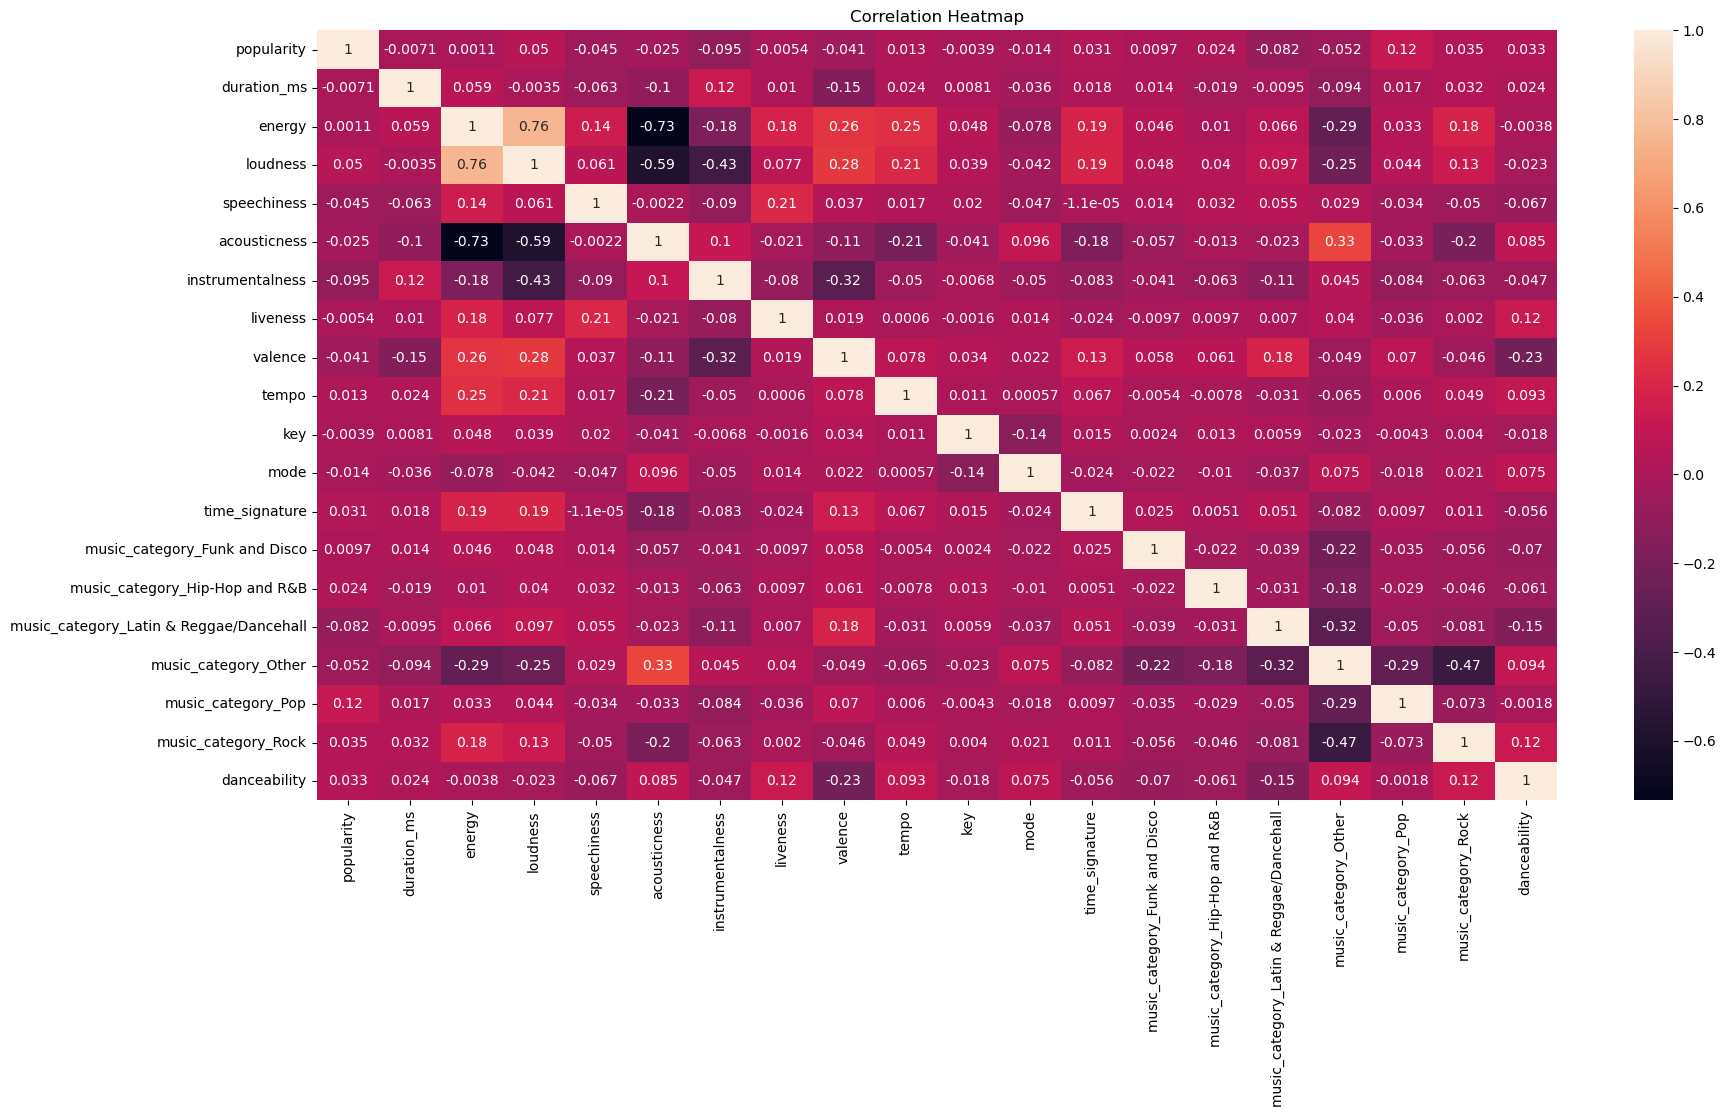

In [23]:
# Plotting a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corrs, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [24]:
# Step 1: Get the Data
X = df_final.drop(columns=["danceability"])
y = df_final.danceability

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,) 
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(114000, 19)
(85500, 19)
(28500, 19)


In [25]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # For multi-class, we need to binarize the labels for ROC AUC
    y_train_bin = label_binarize(y_train, classes=model.classes_)
    y_test_bin = label_binarize(y_test, classes=model.classes_)
    
    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    
    # Multi-class AUC - compute AUC for each class
    train_auc = roc_auc_score(y_train_bin, model.predict_proba(X_train), multi_class="ovr")
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)
    
    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    
    # Multi-class AUC - compute AUC for each class
    test_auc = roc_auc_score(y_test_bin, model.predict_proba(X_test), multi_class="ovr")
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=model.classes_, 
                yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    # Plot ROC curve for each class in a multi-class problem
    plt.figure(figsize=(6, 6))
    for i in range(len(model.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
        plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (AUC = {roc_auc_score(y_test_bin[:, i], model.predict_proba(X_test)[:, i]):.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()


TRAIN METRICS
    Confusion Matrix: 
    [[14037   115 13461]
 [  138  2614  5909]
 [ 6664  1302 41260]]
    
    AUC: 0.8017444236031652

    Classification Report:
                  precision    recall  f1-score   support

           0       0.67      0.51      0.58     27613
           1       0.65      0.30      0.41      8661
           2       0.68      0.84      0.75     49226

    accuracy                           0.68     85500
   macro avg       0.67      0.55      0.58     85500
weighted avg       0.68      0.68      0.66     85500

    
TEST METRICS
    Confusion Matrix: 
    [[ 4596    52  4501]
 [   47   898  2041]
 [ 2190   394 13781]]
    
    AUC: 0.8039785157288404

    Classification Report:
                  precision    recall  f1-score   support

           0       0.67      0.50      0.58      9149
           1       0.67      0.30      0.41      2986
           2       0.68      0.84      0.75     16365

    accuracy                           0.68     28500
   

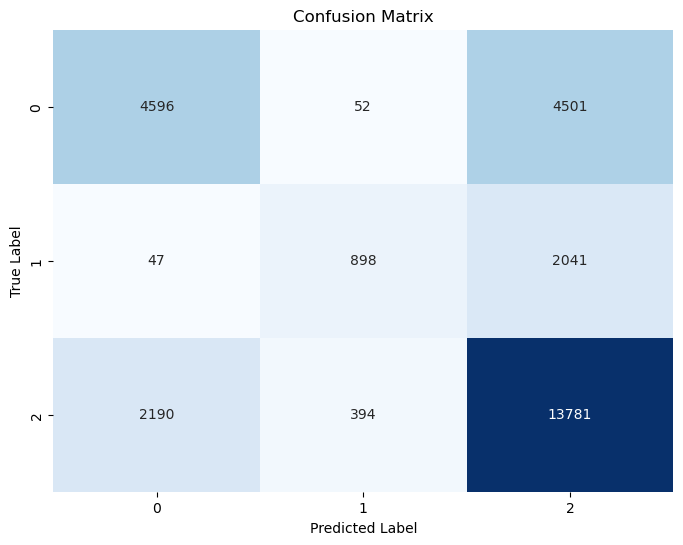

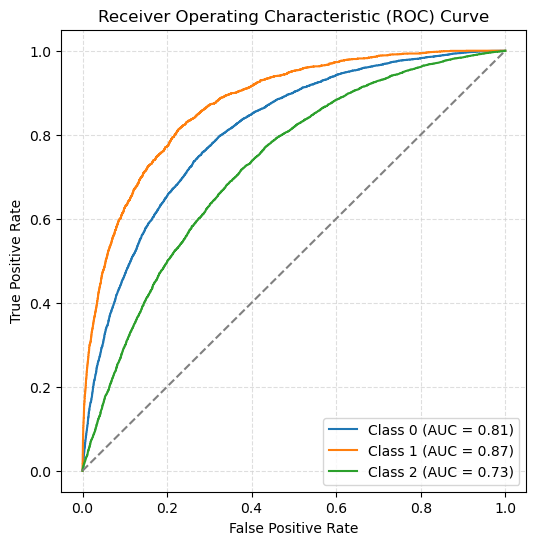

In [26]:
# Step 2: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[27613     0     0]
 [    0  8661     0]
 [    0     0 49226]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     27613
           1       1.00      1.00      1.00      8661
           2       1.00      1.00      1.00     49226

    accuracy                           1.00     85500
   macro avg       1.00      1.00      1.00     85500
weighted avg       1.00      1.00      1.00     85500

    
TEST METRICS
    Confusion Matrix: 
    [[ 7085    17  2047]
 [   17  1789  1180]
 [ 1297   274 14794]]
    
    AUC: 0.941010012532311

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.77      0.81      9149
           1       0.86      0.60      0.71      2986
           2       0.82      0.90      0.86     16365

    accuracy                           0.83     28500
   macro avg       

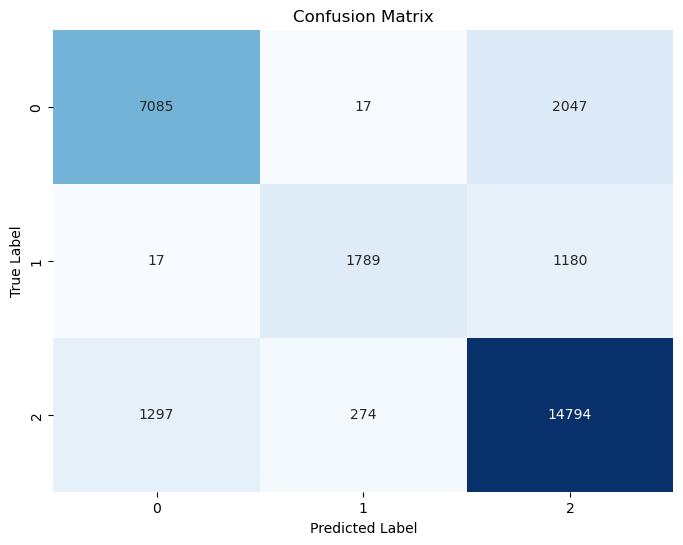

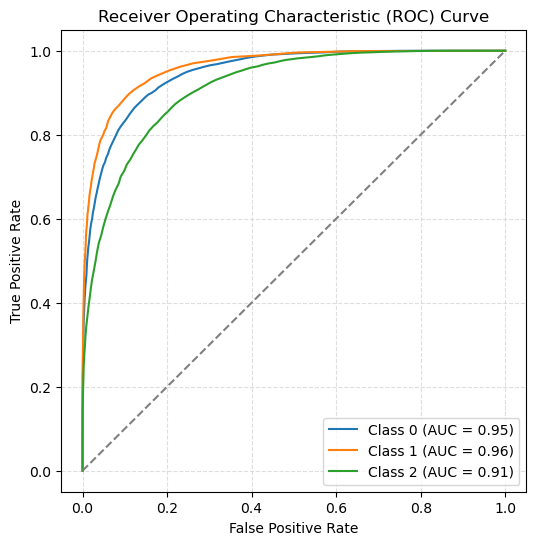

In [27]:
# Step 2: Init the Model
rf = RandomForestClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[18524    44  9045]
 [   83  3757  4821]
 [ 6148  1064 42014]]
    
    AUC: 0.8786911484931896

    Classification Report:
                  precision    recall  f1-score   support

           0       0.75      0.67      0.71     27613
           1       0.77      0.43      0.56      8661
           2       0.75      0.85      0.80     49226

    accuracy                           0.75     85500
   macro avg       0.76      0.65      0.69     85500
weighted avg       0.75      0.75      0.75     85500

    
TEST METRICS
    Confusion Matrix: 
    [[ 6057    34  3058]
 [   35  1246  1705]
 [ 2052   337 13976]]
    
    AUC: 0.8746423324755938

    Classification Report:
                  precision    recall  f1-score   support

           0       0.74      0.66      0.70      9149
           1       0.77      0.42      0.54      2986
           2       0.75      0.85      0.80     16365

    accuracy                           0.75     28500
   

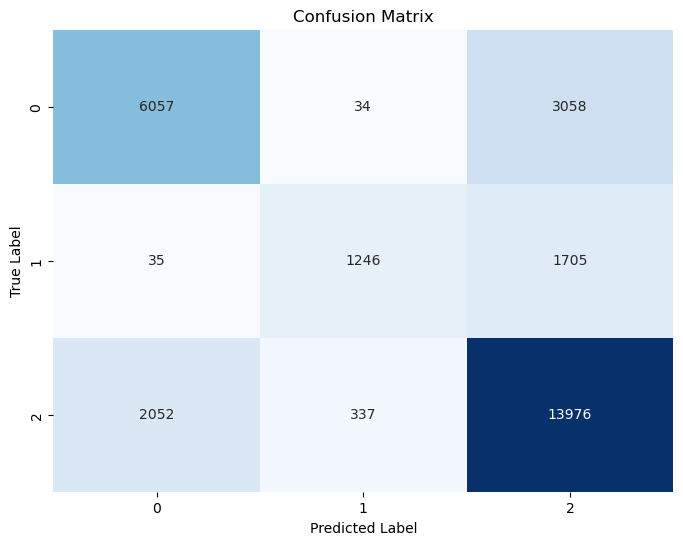

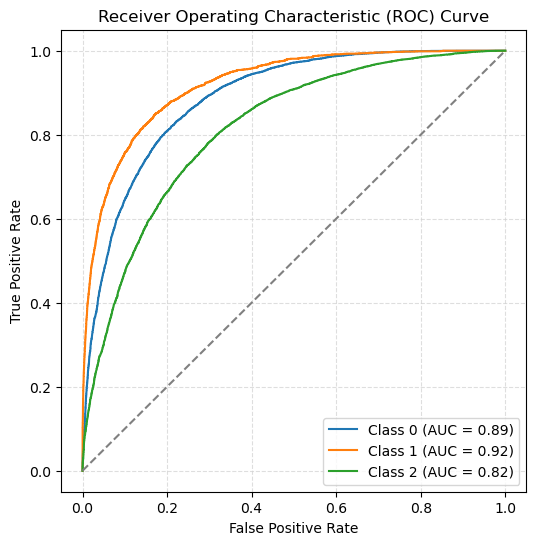

In [28]:
# Step 2: Init the Model
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

In [29]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

TRAIN METRICS
    Confusion Matrix: 
    [[22122    18  5473]
 [   56  5712  2893]
 [ 4427   644 44155]]
    
    AUC: 0.9499197358457431

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.80      0.82     27613
           1       0.90      0.66      0.76      8661
           2       0.84      0.90      0.87     49226

    accuracy                           0.84     85500
   macro avg       0.86      0.79      0.81     85500
weighted avg       0.84      0.84      0.84     85500

    
TEST METRICS
    Confusion Matrix: 
    [[ 6730    16  2403]
 [   26  1638  1322]
 [ 1884   419 14062]]
    
    AUC: 0.9125000815496094

    Classification Report:
                  precision    recall  f1-score   support

           0       0.78      0.74      0.76      9149
           1       0.79      0.55      0.65      2986
           2       0.79      0.86      0.82     16365

    accuracy                           0.79     28500
   

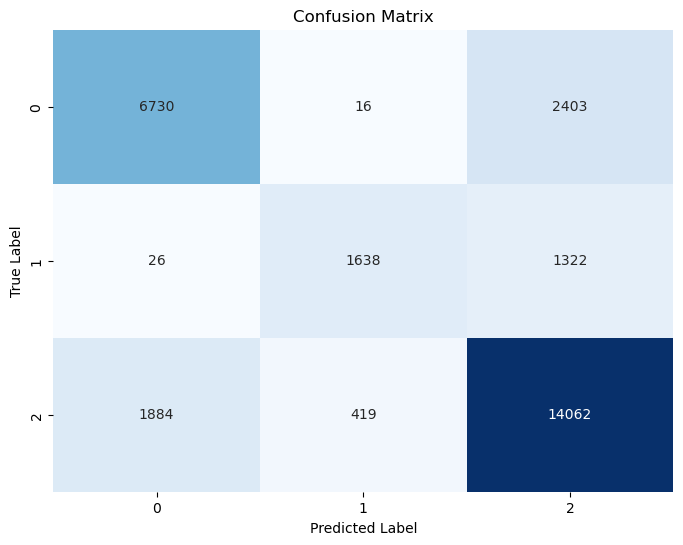

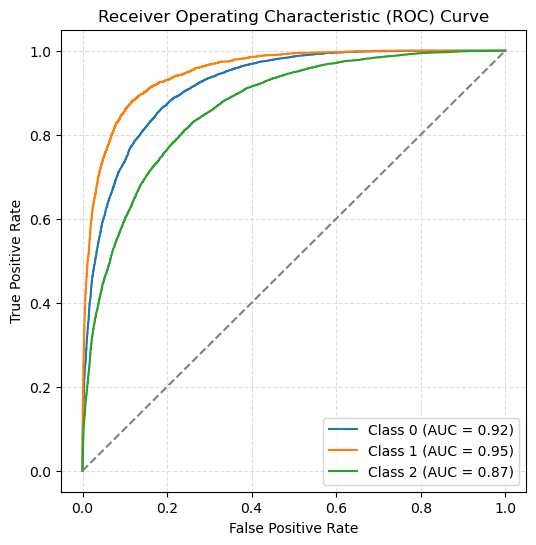

In [30]:
# Step 2: Init the Model
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[20232    32  7349]
 [   69  4796  3796]
 [ 5290  1047 42889]]
    
    AUC: 0.9189705914412367

    Classification Report:
                  precision    recall  f1-score   support

           0       0.79      0.73      0.76     27613
           1       0.82      0.55      0.66      8661
           2       0.79      0.87      0.83     49226

    accuracy                           0.79     85500
   macro avg       0.80      0.72      0.75     85500
weighted avg       0.80      0.79      0.79     85500

    
TEST METRICS
    Confusion Matrix: 
    [[ 6451    16  2682]
 [   25  1563  1398]
 [ 1920   411 14034]]
    
    AUC: 0.9013006969550211

    Classification Report:
                  precision    recall  f1-score   support

           0       0.77      0.71      0.74      9149
           1       0.79      0.52      0.63      2986
           2       0.77      0.86      0.81     16365

    accuracy                           0.77     28500
   

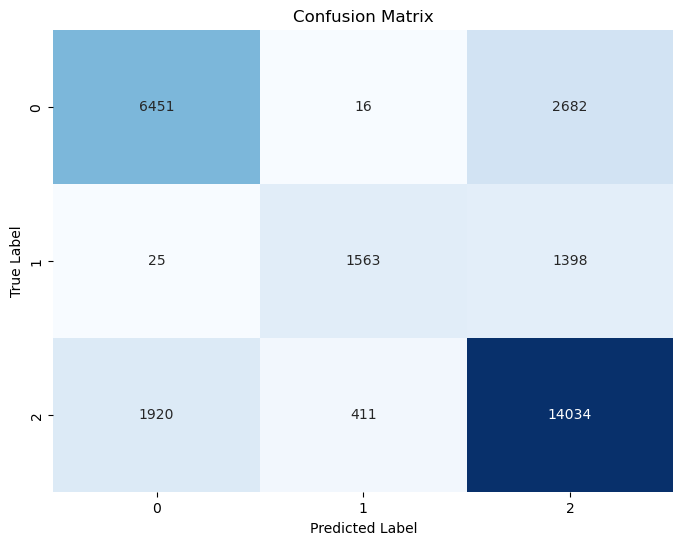

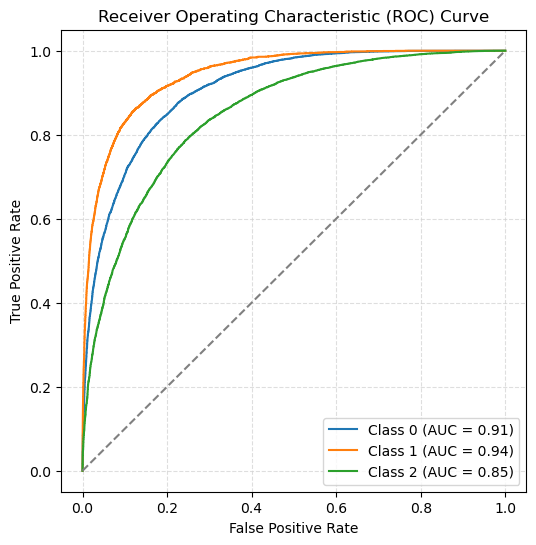

In [31]:
# Step 2: Init the Model
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)

In [32]:
# Retrain the model on the ENTIRE dataset

xgb = XGBClassifier(random_state=42)
xgb.fit(X, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [33]:
 # Save off my models
import pickle

# Scaler
pickle.dump(ss, open("danceability_scaler.pkl", 'wb'))

# Model
pickle.dump(xgb, open("danceability_model.pkl", 'wb'))